# Visualización de datos con matplotlib y seaborn

## Descripción general

[matplotlib](https://matplotlib.org/) es una biblioteca para crear visualizaciones de datos estáticas, animadas e interactivas en Python. Su desarrollo fue liderado por John D. Hunter y Michael Droettboom. Su primera versión se liberó en 2003. Le brinda al programador control sobre todos los detalles de un gráfico estadístico. El módulo [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html), uno de los más populares de matplotlib, proporciona una interfaz de programación similar a la de [MATLAB](https://es.wikipedia.org/wiki/MATLAB). matplotlib es una de las bibliotecas más populares de graficación de Python y puede trabajar de manera integrada con [pandas](https://pandas.pydata.org/) o independientemente.

[seaborn](https://seaborn.pydata.org/) es otra biblioteca para visualización de datos. Implementa una interfaz de alto nivel para matplotlib, con el objetivo de hacerla más fácil de utilizar y mejorar el estilo (colores, formas, etc.) de los gráficos estadísticos.

## Instalación

Ambas bibliotecas pueden instalarse con `pip`, `conda` o `mamba`, desde la línea de comandos del sistema operativo.

Instalación de matplotlib:

```
# Con pip:
pip install matplotlib

# Con conda:
conda install matplotlib -c conda-forge

# Con mamba:
mamba install matplotlib -c conda-forge
```

Instalación de seaborn:

```
# Con pip:
pip install seaborn

# Con conda:
conda install seaborn -c conda-forge

# Con mamba:
mamba install seaborn -c conda-forge
```

## Carga

In [1]:
# Carga de módulos de matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Carga de seaborn
import seaborn as sns

# Carga de pandas
import pandas as pd

## Conjuntos de datos para pruebas

### Casos de COVID-19 en Costa Rica

Estos datos son publicados por el Ministerio de Salud de Costa Rica en [https://geovision.uned.ac.cr/oges/](https://geovision.uned.ac.cr/oges/). Se distribuyen en archivos CSV, incluyendo un archivo de datos generales para todo el país y varios archivos con datos por cantón. La fecha de la última actualización es 2022-05-30.

#### Datos generales

##### Carga de datos

Es un archivo que contiene una fila por día y varias columnas con cantidades de casos (positivos, fallecidos, en salón, en UCI, etc.)

In [2]:
# Datos generales para todo el país
covid_general = pd.read_csv("datos/ministerio-salud/covid/05_30_22_CSV_GENERAL.csv", sep=";")

#### Datos cantonales

Son cuatro archivos con casos positivos, activos, recuperados y fallecidos. Cada archivo tiene una fila para cada uno de los 82 cantones y una fila adicional para "Otros". Hay una columna por cada día muestreado, con la cantidad de casos del tipo respectivo.

##### Carga de datos

In [3]:
# Casos positivos
covid_cantonal_positivos = pd.read_csv("datos/ministerio-salud/covid/05_30_22_CSV_POSITIVOS.csv", 
                                       sep=";", 
                                       encoding="iso-8859-1") # para leer tildes y otros caracteres

# Casos activos
covid_cantonal_activos = pd.read_csv("datos/ministerio-salud/covid/05_30_22_CSV_ACTIVOS.csv", 
                                     sep=";", 
                                     encoding="iso-8859-1") # para leer tildes y otros caracteres

# Casos recuperados
covid_cantonal_recuperados = pd.read_csv("datos/ministerio-salud/covid/05_30_22_CSV_RECUP.csv", 
                                         sep=";", 
                                         encoding="iso-8859-1") # para leer tildes y otros caracteres

# Casos fallecidos
covid_cantonal_fallecidos = pd.read_csv("datos/ministerio-salud/covid/05_30_22_CSV_FALLECIDOS.csv", 
                                        sep=";", 
                                        encoding="iso-8859-1") # para leer tildes y otros caracteres

Para una visualización inicial de la estructura y el contenido de los datos, se despliega el conjunto de casos positivos.

In [4]:
# Casos positivos
covid_cantonal_positivos

,cod_provin,provincia,cod_canton,canton,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,...,21/05/2022,22/05/2022,23/05/2022,24/05/2022,25/05/2022,26/05/2022,27/05/2022,28/05/2022,29/05/2022,30/05/2022
0,1.0,San José,112.0,Acosta,0.0,0.0,0.0,0.0,0.0,0.0,...,3967.0,3974.0,3978.0,4008.0,4012.0,4026.0,4049.0,4054.0,4081.0,4104.0
1,1.0,San José,110.0,Alajuelita,0.0,0.0,0.0,0.0,0.0,0.0,...,18696.0,18711.0,18725.0,18763.0,18802.0,18842.0,18887.0,18918.0,18952.0,18973.0
2,1.0,San José,106.0,Aserrí,0.0,0.0,0.0,0.0,0.0,0.0,...,10680.0,10704.0,10716.0,10729.0,10753.0,10782.0,10812.0,10829.0,10852.0,10880.0
3,1.0,San José,118.0,Curridabat,0.0,0.0,1.0,2.0,3.0,5.0,...,14183.0,14200.0,14216.0,14268.0,14329.0,14382.0,14433.0,14459.0,14486.0,14518.0
4,1.0,San José,103.0,Desamparados,4.0,4.0,4.0,4.0,4.0,5.0,...,42546.0,42611.0,42654.0,42762.0,42843.0,42985.0,43084.0,43147.0,43208.0,43283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,7.0,Limón,702.0,Pococí,0.0,0.0,0.0,0.0,0.0,0.0,...,20167.0,20196.0,20210.0,20243.0,20268.0,20355.0,20379.0,20410.0,20428.0,20449.0
80,7.0,Limón,703.0,Siquirres,0.0,0.0,0.0,0.0,0.0,0.0,...,10226.0,10235.0,10248.0,10265.0,10271.0,10301.0,10315.0,10328.0,10339.0,10349.0
81,7.0,Limón,704.0,Talamanca,0.0,0.0,0.0,0.0,0.0,0.0,...,5415.0,5415.0,5419.0,5425.0,5429.0,5437.0,5444.0,5457.0,5464.0,5468.0
82,9.0,Otros,999.0,Otros,0.0,0.0,0.0,1.0,1.0,7.0,...,350.0,350.0,350.0,350.0,350.0,351.0,351.0,351.0,351.0,352.0


Puede notarse una cantidad muy grande de columnas y también la presencia de caracteres especiales (/) en muchos de los nombres de estas. También que hay una fila con un cantón correspondiente a "Otros" y otra con valores nulos.

##### Reducción de columnas y eliminación de filas innecesarias

Se reduce la cantidad de columnas, de manera que solo se conservan las que corresponde a la última fecha muestreada, al nombre del cantón y al de la provincia. También se eliminan las filas con valores nulos u "Otros".

In [5]:
# Reducción de columnas
covid_cantonal_positivos = covid_cantonal_positivos[["provincia", "canton", "30/05/2022"]]
covid_cantonal_fallecidos = covid_cantonal_fallecidos[["provincia", "canton", "30/05/2022"]]
covid_cantonal_recuperados = covid_cantonal_recuperados[["provincia", "canton", "30/05/2022"]]
covid_cantonal_activos = covid_cantonal_activos[["provincia", "canton", "30/05/2022"]]

# Eliminación de fila con valores nulos
covid_cantonal_positivos = covid_cantonal_positivos.dropna(how='all')
covid_cantonal_fallecidos = covid_cantonal_fallecidos.dropna(how='all')
covid_cantonal_recuperados = covid_cantonal_recuperados.dropna(how='all')
covid_cantonal_activos = covid_cantonal_activos.dropna(how='all')

# Eliminación de fila con canton=="Otros"
covid_cantonal_positivos = covid_cantonal_positivos[covid_cantonal_positivos["canton"] != "Otros"]
covid_cantonal_fallecidos = covid_cantonal_fallecidos[covid_cantonal_fallecidos["canton"] != "Otros"]
covid_cantonal_recuperados = covid_cantonal_recuperados[covid_cantonal_recuperados["canton"] != "Otros"]
covid_cantonal_activos = covid_cantonal_activos[covid_cantonal_activos["canton"] != "Otros"]

# Renombramiento de columnas
covid_cantonal_positivos = covid_cantonal_positivos.rename(columns={"30/05/2022": "positivos"})
covid_cantonal_fallecidos = covid_cantonal_fallecidos.rename(columns={"30/05/2022": "fallecidos"})
covid_cantonal_recuperados = covid_cantonal_recuperados.rename(columns={"30/05/2022": "recuperados"})
covid_cantonal_activos = covid_cantonal_activos.rename(columns={"30/05/2022": "activos"})

In [6]:
# Despliegue de los cambios
covid_cantonal_positivos

,provincia,canton,positivos
0,San José,Acosta,4104.0
1,San José,Alajuelita,18973.0
2,San José,Aserrí,10880.0
3,San José,Curridabat,14518.0
4,San José,Desamparados,43283.0
...,...,...,...
77,Limón,Limón,16822.0
78,Limón,Matina,5822.0
79,Limón,Pococí,20449.0
80,Limón,Siquirres,10349.0


### Pasajeros del Titanic

Este es el conjunto de datos de entrenamiento de la competencia [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) organizada por [Kaggle](https://www.kaggle.com/). El archivo también está disponible en [https://github.com/pf3311-cienciadatosgeoespaciales/2021-iii/blob/main/contenido/b/datos/entrenamiento.csv](https://github.com/pf3311-cienciadatosgeoespaciales/2021-iii/blob/main/contenido/b/datos/entrenamiento.csv).

#### Carga de datos

In [7]:
# Pasajeros en el conjunto de datos de entrenamiento
titanic = pd.read_csv("datos/kaggle/titanic/pasajeros-titanic-entrenamiento.csv")

# Despliegue de los datos
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Visualizaciones de datos

Las siguientes visualizaciones se implementan con los métodos de matplotlib integrados en pandas. Los gráficos resultantes se complementan con pyplot. Se desarrollan también algunos ejemplos con seaborn.

### Histogramas

Un [histograma](https://es.wikipedia.org/wiki/Histograma) es una representación gráfica de la distribución de una variable numérica en forma de barras (llamadas en inglés *bins*). La longitud de cada barra representa la frecuencia de un rango de valores de la variable. La graficación de la distribución de las variables es, frecuentemente, una de las primeras tareas que se realiza cuando se explora un conjunto de datos.

En pandas, los histogramas se crean con el método [pandas.DataFrame.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html). Elementos adicionales del gráfico, como el título y las etiquetas de los ejes, pueden agregarse con matplotlib.pyplot.

El siguiente histograma muestra la distribución de la variable correspondiente a los casos de COVID positivos en los cantones de Costa Rica.

Text(0, 0.5, 'Frecuencia')

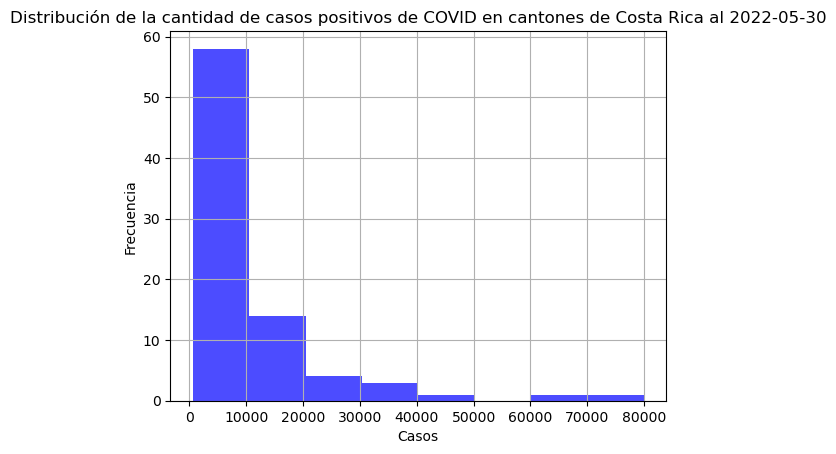

In [8]:
# Histograma de casos positivos en cantones
covid_cantonal_positivos["positivos"].hist(
    bins=8,
    color="blue",
    alpha=0.7)

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos positivos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Casos")
plt.ylabel("Frecuencia")

El método [seaborn.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) permite crear histogramas con seaborn. El argumento `kde` se utiliza para añadir una estimación de densidad del kernel (*Kernel Density Estimation*, KDE), una curva que muestra la densidad de los datos.

Text(0, 0.5, 'Frecuencia')

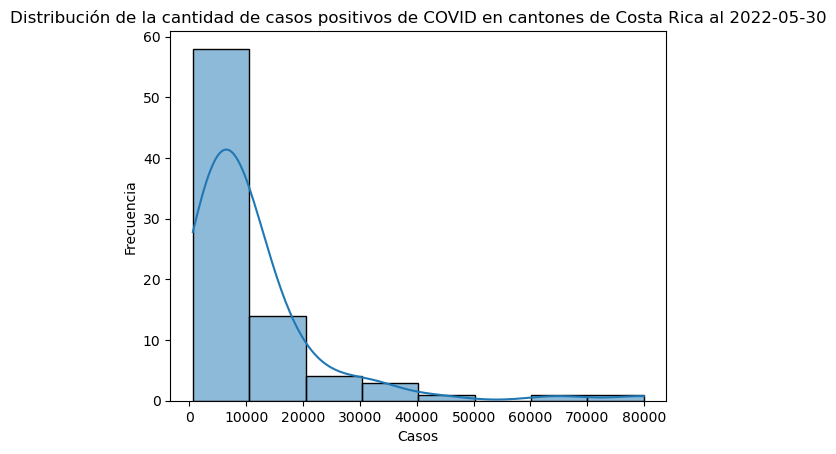

In [9]:
# Histograma y curva de densidad
sns.histplot(data=covid_cantonal_positivos, x="positivos", bins=8, kde=True)

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos positivos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Casos")
plt.ylabel("Frecuencia")

El argumento `hue` se usa para mostrar una división de cada *bin* de acuerdo con el valor de alguna columna.

Text(0, 0.5, 'Frecuencia')

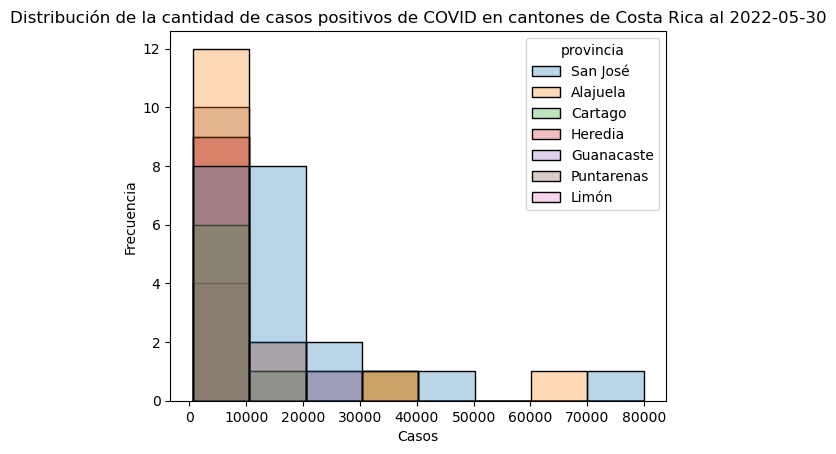

In [10]:
# Histograma con "bins" divididos por provincia 
sns.histplot(data=covid_cantonal_positivos, 
             x="positivos", 
             bins=8, 
             hue="provincia", 
             alpha=0.3)

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos positivos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Casos")
plt.ylabel("Frecuencia")

#### Ejercicios

1. Construya un histograma que muestre la distribución de la edad de los pasajeros del Titanic. Incluya una curva de densidad.
2. Agregue la distribución de la variable de sobrevivencia al histograma del ejercicio anterior.

3. Construya un histograma que muestre la distribución de la cantidad de padres e hijos que viajaban con los pasajeros del Titanic. Incluya una curva de densidad.
4. Agregue la distribución de la variable de sobrevivencia al histograma del ejercicio anterior.

5. Construya un histograma que muestre la distribución de la cantidad de hermanos y cónyugues que viajaban con los pasajeros del Titanic. Incluya una curva de densidad.
6. Agregue la distribución de la variable de sobrevivencia al histograma del ejercicio anterior.

### Gráficos de caja

Un [gráfico de caja (*boxplot*)](https://es.wikipedia.org/wiki/Diagrama_de_caja) muestra información de una variable numérica a través de su [mediana](https://es.wikipedia.org/wiki/Mediana), sus [cuartiles](https://es.wikipedia.org/wiki/Cuartiles) (Q1, Q2 y Q3) y sus [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico).

En pandas, los gráficos de caja se crean con el método [pandas.DataFrame.boxplot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

El siguiente diagrama de caja muestra la distribución de la variable correspondiente a los casos de COVID fallecidos en los cantones de Costa Rica.

Text(0, 0.5, 'Casos')

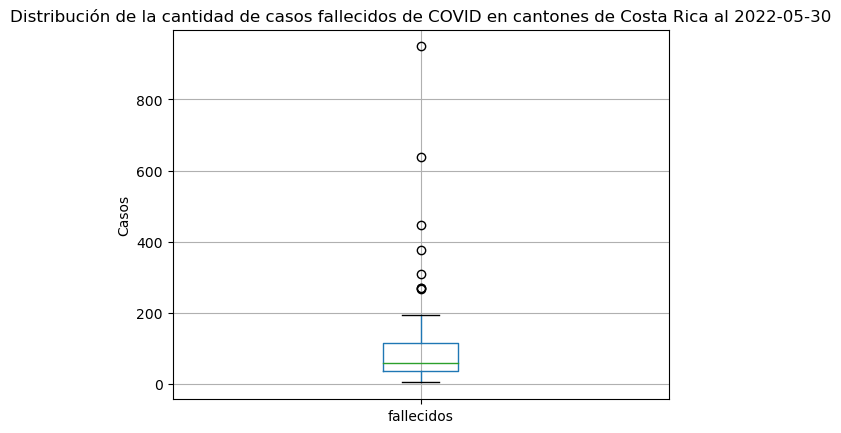

In [11]:
# Gráfico de caja de casos fallecidos en cantones
covid_cantonal_fallecidos.boxplot(column="fallecidos")

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos fallecidos de COVID en cantones de Costa Rica al 2022-05-30")
plt.ylabel("Casos")

El argumento `by` puede utilizarse para agrupar los datos por una variable adicional, como la provincia.

Text(0, 0.5, 'Casos')

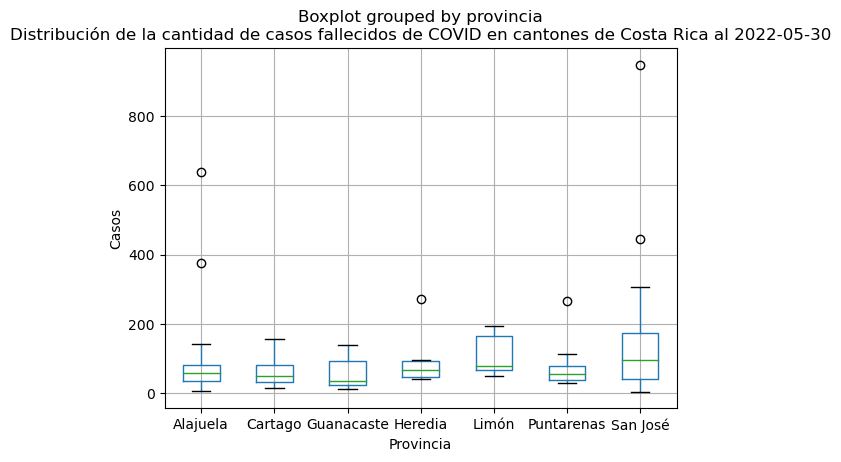

In [12]:
# Gráfico de caja de casos fallecidos en cantones, agrupados por provincia
covid_cantonal_fallecidos.boxplot(column="fallecidos", by="provincia")

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos fallecidos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Provincia")
plt.ylabel("Casos")

El método [seaborn.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) permite crear gráficos de caja con seaborn.

Text(0, 0.5, 'Casos')

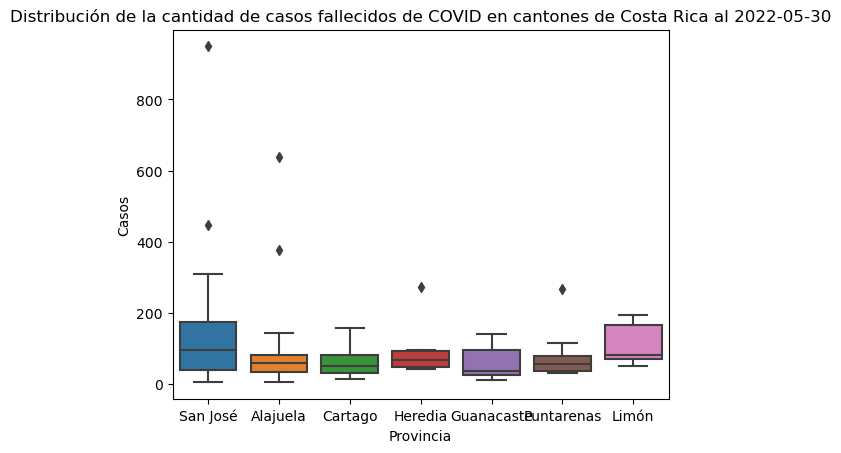

In [13]:
# Gráfico de caja de casos fallecidos en cantones agrupados por provincia
sns.boxplot(y=covid_cantonal_fallecidos["fallecidos"], 
            x=covid_cantonal_fallecidos["provincia"])

# Título y etiquetas en los ejes
plt.title("Distribución de la cantidad de casos fallecidos de COVID en cantones de Costa Rica al 2022-05-30")
plt.xlabel("Provincia")
plt.ylabel("Casos")

#### Ejercicios

1. Construya un gráfico de caja de la edad de los pasajeros del Titanic.
2. Agregue la distribución de la variable de sobrevivencia al gráfico del ejercicio anterior.

3. Construya un gráfico de caja de la cantidad de padres e hijos que viajaban con los pasajeros del Titanic.
4. Agregue la distribución de la variable de sobrevivencia al gráfico del ejercicio anterior.

5. Construya un gráfico de caja de la cantidad de hermanos y cónyugues que viajaban con los pasajeros del Titanic.
6. Agregue la distribución de la variable de sobrevivencia al gráfico del ejercicio anterior.

### Gráficos de barras

Un [gráfico de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) se compone de barras rectangulares con longitud proporcional a estadísticas (ej. frecuencias, promedios, mínimos, máximos) asociadas a una variable categórica o discreta. Las barras pueden ser horizontales o verticales y se recomienda que estén ordenadas según su longitud, a menos que exista un orden inherente a la variable (ej. el orden de los días de la semana).

En pandas, los gráficos de barras se crean con los métodos [pandas.DataFrame.plot.bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html), para barras verticales, y [pandas.DataFrame.plot.barh()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html), para barras horizontales.

El siguiente gráfico de barras verticales muestra las cantidades de casos positivos en los cantones de Limón.

Text(0, 0.5, 'Casos')

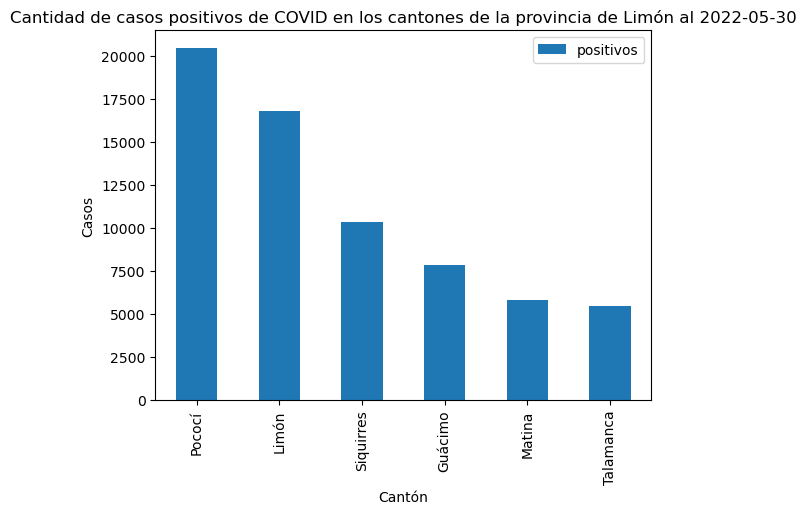

In [14]:
# Subconjunto de cantones de la provincia de Limón
covid_limon_positivos = covid_cantonal_positivos[covid_cantonal_positivos["provincia"] == "Limón"]

# Se establece la columna "canton" como índice del dataframe
# y este se ordena por la cantidad de casos positivos antes de
# hacer el gráfico con plot.bar()
covid_limon_positivos.set_index("canton").sort_values(by="positivos", ascending=False).plot.bar()

plt.title("Cantidad de casos positivos de COVID en los cantones de la provincia de Limón al 2022-05-30")
plt.xlabel("Cantón")
plt.ylabel("Casos")

El siguiente gráfico de barras horizontales muestra las cantidades de casos activos en los cantones de San José.

Text(0, 0.5, 'Casos')

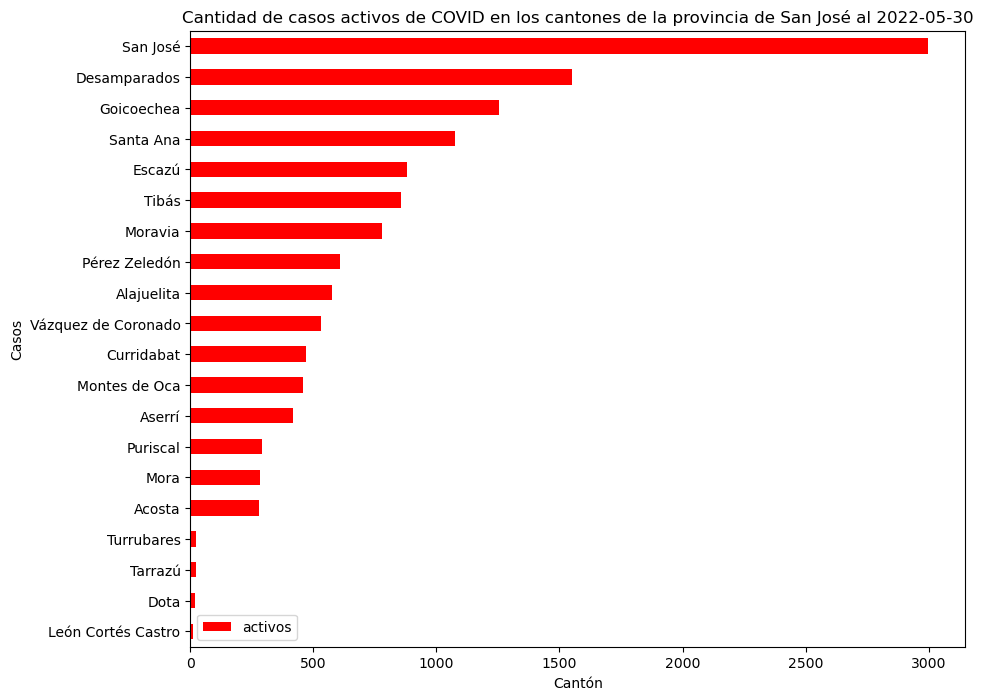

In [15]:
# Subconjunto de cantones de la provincia de San José
covid_sanjose_activos = covid_cantonal_activos[covid_cantonal_activos["provincia"] == "San José"]

# Se establece la columna "canton" como índice del dataframe
# y este se ordena por la cantidad de casos antes de
# hacer el gráfico con plot.barh().
# También se establece el tamaño del gráfico con figsize()
covid_sanjose_activos.set_index("canton").sort_values(by="activos").plot.barh(color="red", figsize=(10, 8))

plt.title("Cantidad de casos activos de COVID en los cantones de la provincia de San José al 2022-05-30")
plt.xlabel("Cantón")
plt.ylabel("Casos")

En el siguiente ejemplo, se utiliza el método [pandas.DataFrame.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) para agrupar los datos por provincia y sumar los casos positivos.

Text(0, 0.5, 'Casos')

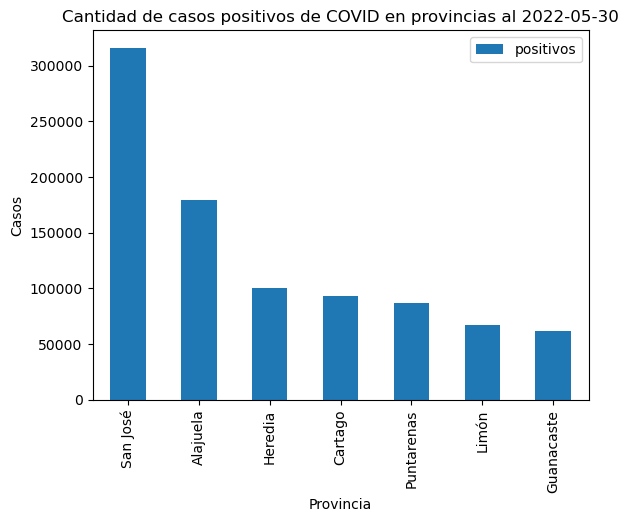

In [16]:
# Suma de casos positivos por provincia
covid_provincial_positivos = covid_cantonal_positivos.groupby(["provincia"], as_index=False)["positivos"].sum()
covid_provincial_positivos

# Se establece la columna "provincia" como índice del dataframe
# y este se ordena por la cantidad de casos positivos antes de
# hacer el gráfico con plot.bar()
covid_provincial_positivos.set_index("provincia").sort_values(by="positivos", ascending=False).plot.bar()

plt.title("Cantidad de casos positivos de COVID en provincias al 2022-05-30")
plt.xlabel("Provincia")
plt.ylabel("Casos")

El método [seaborn.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html) permite crear gráficos de barras con seaborn.

El siguiente gráfico muestra la proporción de sobrevivientes por sexo y clase entre los pasajeros del Titanic.

Text(0, 0.5, 'Proporción de sobrevivientes')

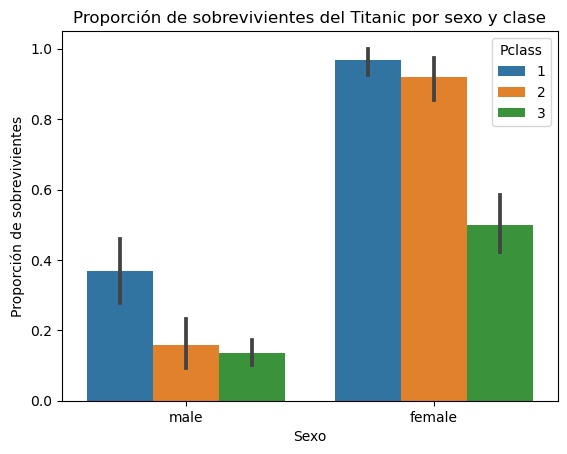

In [17]:
# Gráfico de barras
sns.barplot(data=titanic, x="Sex", y="Survived", hue="Pclass")

plt.title("Proporción de sobrevivientes del Titanic por sexo y clase")
plt.xlabel("Sexo")
plt.ylabel("Proporción de sobrevivientes")

#### Ejercicios

1. Convierta el gráfico de barras del ejemplo de proporción de sobrevivientes por sexo y clase entre los pasajeros del Titanic, en un gráfico de barras apiladas.

## Recursos de interés

[From data to Viz | Find the graphic you need](https://www.data-to-viz.com/)